In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:\Buddi\buddi.ai\datas\Month_Value_1.csv')
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


# Data Processing

In [3]:
df['Period'].describe()

count             96
unique            96
top       01.01.2015
freq               1
Name: Period, dtype: object

In [4]:
df['Period'] = pd.to_datetime(df['Period'],format = '%d.%m.%Y')

In [5]:
df['Period'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 96 entries, 0 to 95
Series name: Period
Non-Null Count  Dtype         
--------------  -----         
96 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 896.0 bytes


In [6]:
df['Period'] = df['Period'].dt.to_period('M')
df = df.loc[0:63,['Period','Revenue']]
df.head()

,Period,Revenue
0,2015-01,1.601007e+07
1,2015-02,1.580759e+07
2,2015-03,2.204715e+07
3,2015-04,1.881458e+07
4,2015-05,1.402148e+07


In [7]:
df['Year'] = df['Period'].dt.year
df['Month'] = df['Period'].dt.month
df.set_index('Period',inplace=True)
df.head()

,Revenue,Year,Month
Period,,,
2015-01,1.601007e+07,2015,1
2015-02,1.580759e+07,2015,2
2015-03,2.204715e+07,2015,3
2015-04,1.881458e+07,2015,4
2015-05,1.402148e+07,2015,5


# EDA

<AxesSubplot:title={'center':'Revenue Chart'}, xlabel='Period'>

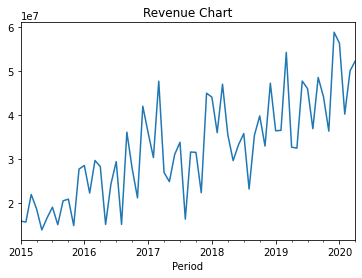

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Revenue Chart")
df['Revenue'].plot()

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

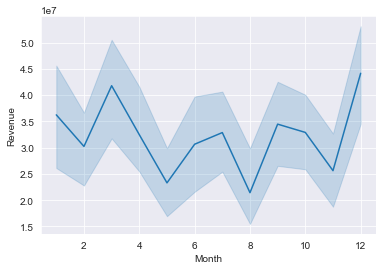

In [9]:
sns.set_style("darkgrid")
sns.lineplot(x='Month',y='Revenue',data=df)

<AxesSubplot:xlabel='Year', ylabel='Revenue'>

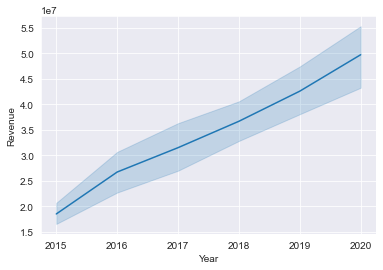

In [10]:
sns.lineplot(x='Year',y='Revenue',data=df)

In [11]:
x = df['Year']
y = df['Revenue']

#for coefficent 
theta = np.polyfit(x,y,deg=1)
theta

array([ 5.88611330e+06, -1.18410337e+10])

In [53]:
y_pred = theta[0]*df['Year'] + theta[1]

In [54]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df['Revenue'],y_pred))

50174524370311.63


# Validating the regplot

<AxesSubplot:xlabel='Year', ylabel='Revenue'>

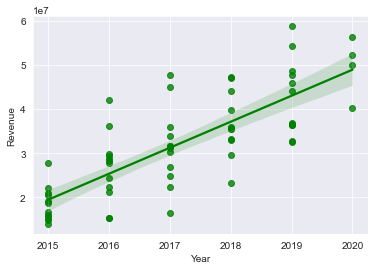

In [36]:
sns.regplot(data=df, x='Year', y='Revenue', color='g')

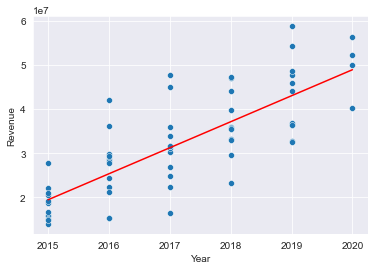

In [55]:
sns.scatterplot(x='Year',y='Revenue',data=df)
plt.plot(df.Year,y_pred,color='r')

In [41]:
df.to_csv(r'D:\buddi.ai\assignments\datas\year_rev.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


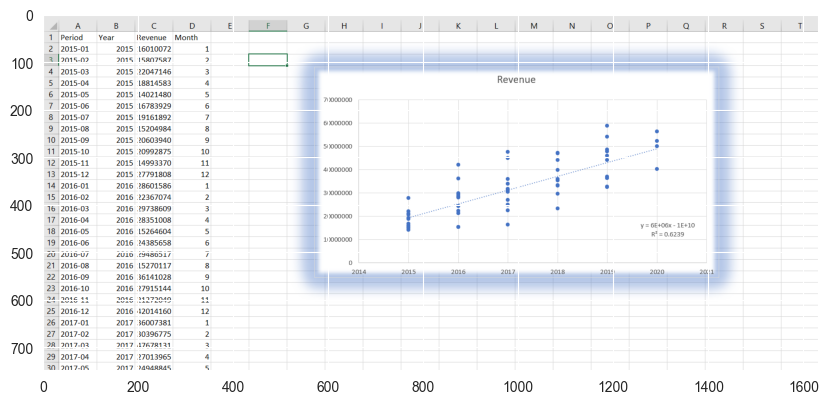

In [58]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(dpi=100,figsize=(10,10))
img = mpimg.imread(r'D:\Buddi\Assignment\datas\year_rev - Excel 19-04-2022 21_54_21.png')
imgplot = plt.imshow(img)
plt.show()

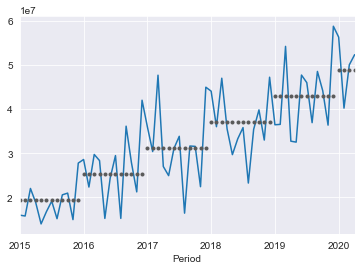

In [60]:
ax = df['Revenue'].plot()
ax = y_pred.plot(style='.',color='0.35',ax=ax)

# Month

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

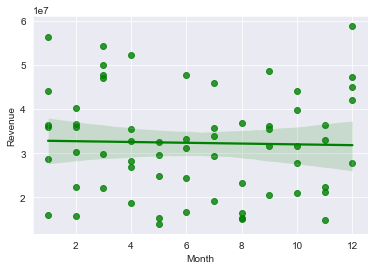

In [12]:
sns.regplot(data=df, x='Month', y='Revenue', color='g')

In [13]:
df.head()

,Revenue,Year,Month
Period,,,
2015-01,1.601007e+07,2015,1
2015-02,1.580759e+07,2015,2
2015-03,2.204715e+07,2015,3
2015-04,1.881458e+07,2015,4
2015-05,1.402148e+07,2015,5


In [14]:
df1 = df.reset_index()
df1.head()

,Period,Revenue,Year,Month
0,2015-01,1.601007e+07,2015,1
1,2015-02,1.580759e+07,2015,2
2,2015-03,2.204715e+07,2015,3
3,2015-04,1.881458e+07,2015,4
4,2015-05,1.402148e+07,2015,5


<AxesSubplot:xlabel='Month', ylabel='Revenue'>

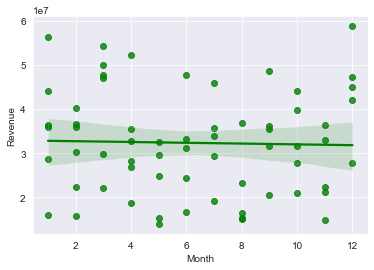

In [17]:
sns.regplot(data=df, x='Month', y='Revenue', color='g')

In [18]:
df2 = pd.read_csv(r'D:\Buddi\buddi.ai\datas\silver.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,5.290,5.290,5.290,5.335,3,USD
1,2000-01-05,5.170,5.170,5.170,5.170,0,USD
2,2000-01-06,5.127,5.127,5.127,5.127,0,USD
3,2000-01-07,5.150,5.150,5.150,5.150,50,USD
4,2000-01-10,5.145,5.145,5.145,5.145,62,USD


In [19]:
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6034 entries, 0 to 6033
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
6034 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB


In [20]:
df2['Date'] = pd.to_datetime(df2['Date'],format = '%Y-%m-%d')

In [21]:
df2['Date'] = df2['Date'].dt.to_period('M')


In [22]:
df2.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01,5.290,5.290,5.290,5.335,3,USD
1,2000-01,5.170,5.170,5.170,5.170,0,USD
2,2000-01,5.127,5.127,5.127,5.127,0,USD
3,2000-01,5.150,5.150,5.150,5.150,50,USD
4,2000-01,5.145,5.145,5.145,5.145,62,USD


In [24]:
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2.head()

,Date,Open,High,Low,Close,Volume,Currency,Year,Month
0,2000-01,5.290,5.290,5.290,5.335,3,USD,2000,1
1,2000-01,5.170,5.170,5.170,5.170,0,USD,2000,1
2,2000-01,5.127,5.127,5.127,5.127,0,USD,2000,1
3,2000-01,5.150,5.150,5.150,5.150,50,USD,2000,1
4,2000-01,5.145,5.145,5.145,5.145,62,USD,2000,1


<AxesSubplot:xlabel='Year', ylabel='High'>

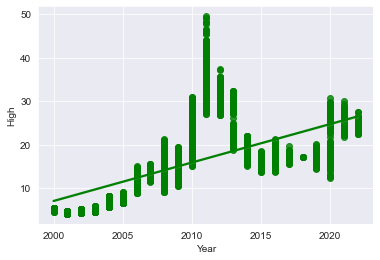

In [26]:
sns.regplot(data=df2, x='Year', y='High', color='g')